# Over and Underfitting



In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from numpy.random import default_rng
rng = default_rng(seed=1) # setting a seed make the sequence of pseudo-random numbers reproducible
import seaborn as sns 
from sklearn.pipeline import Pipeline # For setting up pipeline
from sklearn.model_selection import train_test_split


In [2]:
# order of the polynomial. Reused below
poly_order = 7

In [3]:
# define a helper function
def plot_poly(coeffs, x_range):
    x = np.linspace(x_range[0], x_range[1], 50)
    y = np.polyval(coeffs, x) 
    plt.plot(x, y, '-', linewidth=3, color='gray', label='unknown function')
    #plt.title('Polynomial of order {}'.format(len(coeffs)-1))
    plt.xlabel('x')
    plt.ylabel('y=f(x)')
    plt.grid()


[ 0.58275137  3.65324587 -1.99088271  3.64054613 -0.81717984 -0.03671486
  2.79391816]


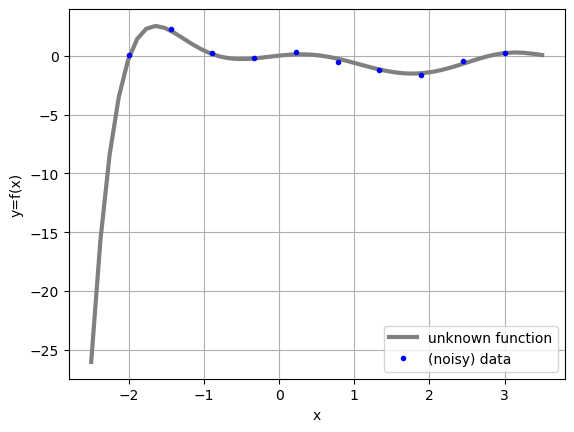

In [4]:
nr_of_data_points = 10
noise_scale_factor = 0.1 # make the noise level relative to min/max Y-values.

#define intervals for simple data generation and visualization  
interval_data = [-2, 3] # restrict the domain where we sample points
interval_plot = [-2.5, 3.5] # plot interval
interval_roots = [-3, 4] # allowing roots outside the plot interval gives more interesting polynomials.

# generate random coefficients. Note: we could generate the coefficients directly from a random generator, 
# but it gives nicer plots if we generate roots at random locations and then calculate the coefficients from there.
roots = rng.uniform(interval_roots[0], interval_roots[1], poly_order) 
coefficients = np.poly(roots) *0.02 # avoid huge values. Scale coeffs down by 0.02
print(roots)

# reshaping transfroms the data from a n-dim-vector into an n-by-1 matrix
X_Data = np.linspace(interval_data[0], interval_data[1], nr_of_data_points).reshape(-1, 1)
Y_no_noise =  np.polyval(coefficients, X_Data) 
range_y = np.max(Y_no_noise) - np.min(Y_no_noise)
noise = rng.normal(loc=0.0, scale=range_y*noise_scale_factor, size=Y_no_noise.shape)
Y_Data = Y_no_noise + noise

    

plot_poly(coefficients, interval_plot)
plt.plot(X_Data, Y_Data, 'o', color='blue', markersize=3, label='(noisy) data')
plt.legend()



In [6]:
print(roots)

[ 0.58275137  3.65324587 -1.99088271  3.64054613 -0.81717984 -0.03671486
  2.79391816]


[0.72171756]


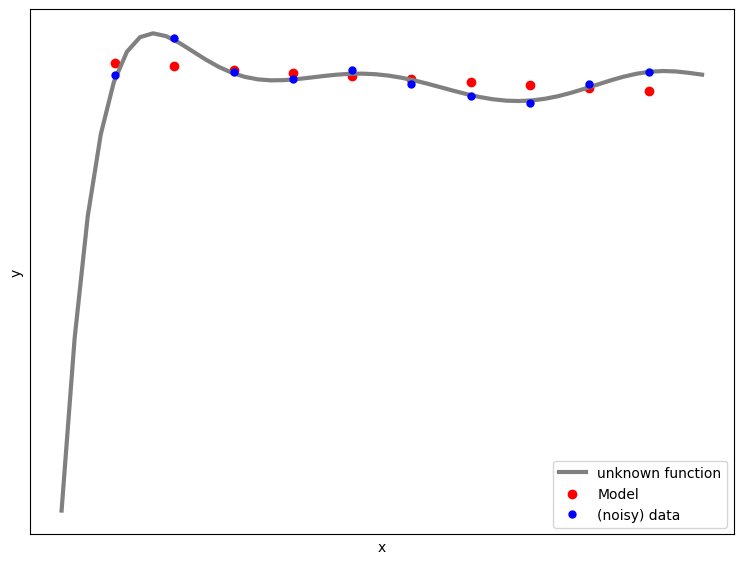

[0.32469155]


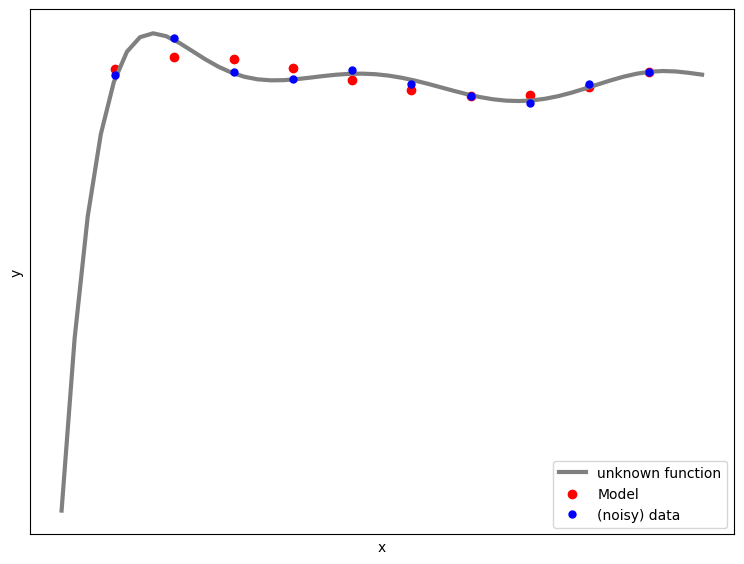

[0.00875196]


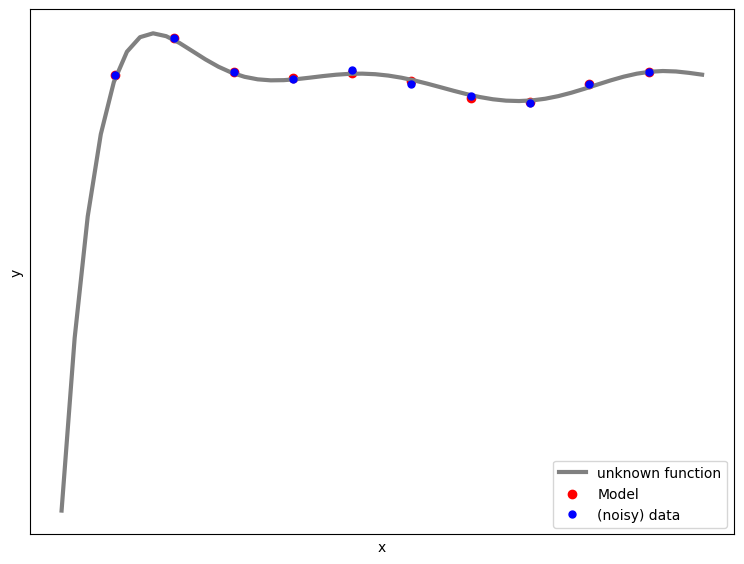

[9.40225704e-27]


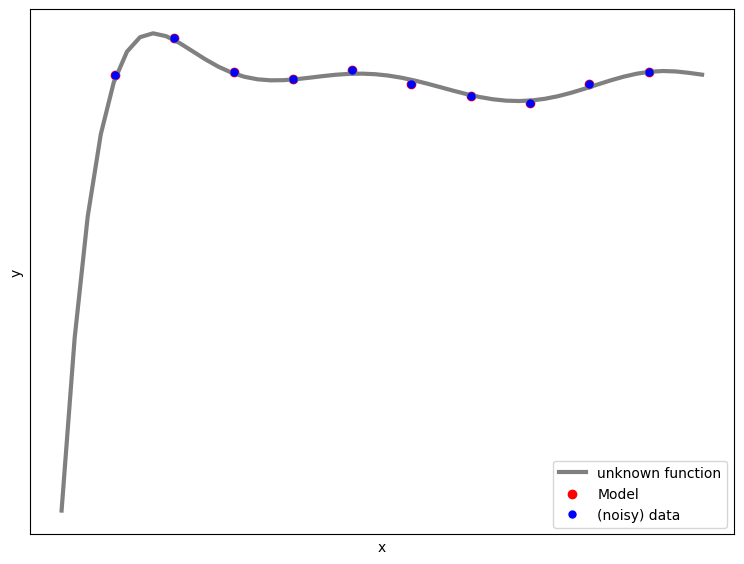

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
#degrees = [1, 4, 7, 15, 20, 30]
degrees = [1,4,7,10]

X = X_Data 
y = Y_Data 

for i in range(len(degrees)):
    plt.figure(figsize=(20, 15))
    ax = plt.subplot(2, int(len(degrees)/2), i+1)
    plt.setp(ax, xticks=(), yticks=())

    scaler = StandardScaler()
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ('scaler', scaler),            
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_Data, Y_Data)

    # Evaluate the models using crossvalidation
    #plot_poly(coefficients, interval_plot)
    Y_hat = pipeline.predict(X)
    #Y_hat = pipeline.stepsinverse_transform(Y_hat)
    Esum = 0
    for ii in range(nr_of_data_points):
            xi = X_Data[ii]
            yi = Y_Data[ii]
            y_hat = Y_hat[ii]
            err = yi-y_hat # difference between data and model estimate
            Esum += (err**2)
            #if abs(err) > 0.01 :
            #    sq = plt.Rectangle( (xi, yi), abs(err), -err , alpha=0.2, color='r')
            #     ax.add_patch(sq)
            #    plt.plot([xi, xi], [yi, y_hat], linewidth=3, color='r')
    print(Esum/nr_of_data_points)
    
    plot_poly(coefficients, interval_plot)
    plt.scatter(X, pipeline.predict(X), label="Model", color='red')
    plt.plot(X, y, 'o', color='blue', markersize=5, label='(noisy) data')
    #plt.plot(X, y, '-', linewidth=3, color='gray', label='noisy data')
    #plt.scatter(X, y, '-', edgecolor="b", s=20, label="True Values")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    
    plt.show()

# Test the Model on unseen data, i.e, data points not used in training.
We can also find the expected actual value since we know the original function.

[[-0.53354462]]
[-0.08588514]
ESUM = [15.23572576]
ESUM = [16.21120543]
ESUM = [16.75319286]


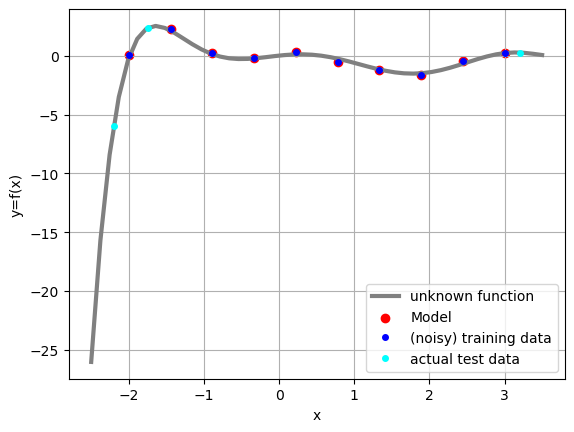

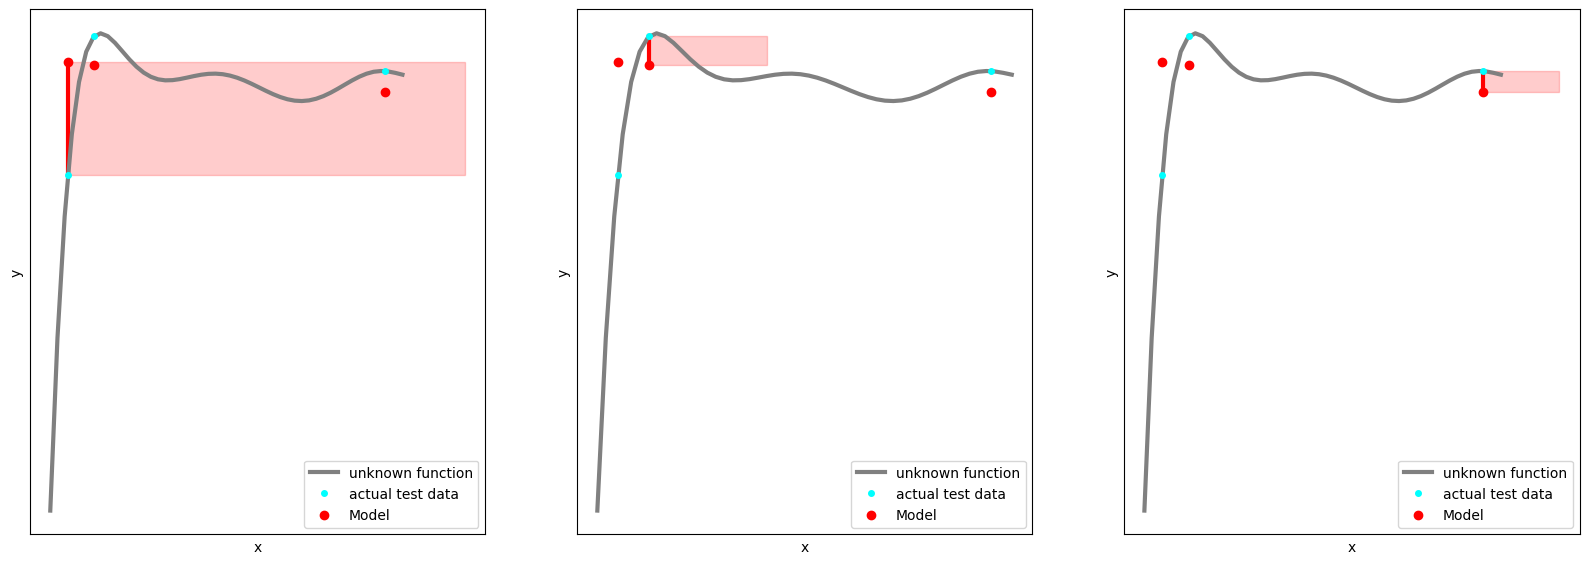

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [8]:
nr_of_test_points = 3
noise_scale_factor = 0.1 # make the noise level relative to min/max Y-values.

#define intervals for simple data generation and visualization  
interval_data = [-2.2, 3] # restrict the domain where we sample points
interval_plot = [-2.5, 3.5] # plot interval

# reshaping transfroms the data from a n-dim-vector into an n-by-1 matrix
X_Test1 = np.linspace(interval_data[0], interval_data[1], nr_of_test_points).reshape(-1, 1)
X_Test = np.array([-2.2, -1.75, 3.2]).reshape(-1, 1)

Y_no_noise =  np.polyval(coefficients, X_Test) 
range_y = np.max(Y_no_noise) - np.min(Y_no_noise)
noise = rng.normal(loc=0.0, scale=range_y*noise_scale_factor, size=Y_no_noise.shape)


Y_Noise = Y_no_noise + noise
Y_Actual = np.polyval(coefficients, X_Test) 

plot_poly(coefficients, interval_plot)
plt.scatter(X_Data, pipeline.predict(X_Data), label="Model", color='red')
plt.plot(X_Data, Y_Data, 'o', color='blue', markersize=4, label='(noisy) training data')
plt.plot(X_Test, Y_Actual, 'o', color='cyan', markersize=4, label='actual test data')
plt.legend()

plt.figure(figsize=(20, 15))

scaler = StandardScaler()
polynomial_features = PolynomialFeatures(1, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ('scaler', scaler),            
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X_Data, Y_Data)
print(pipeline.named_steps['linear_regression'].coef_)
print(pipeline.named_steps['linear_regression'].intercept_)

Y_hat = pipeline.predict(X_Test)
Esum = 0
for i in range(nr_of_test_points):
    ax = plt.subplot(2, nr_of_test_points, i+1)
    plt.setp(ax, xticks=(), yticks=())
    xi = X_Test[i]
    yi = Y_Actual[i]
    y_hat = Y_hat[i]
    err = yi-y_hat # difference between data and model estimate
    Esum += (err**2)
    if abs(err) > 0.01 :
        sq = plt.Rectangle( (xi, yi), abs(err), -err , alpha=0.2, color='r')
        ax.add_patch(sq)
        plt.plot([xi, xi], [yi, y_hat], linewidth=3, color='r')
    print("ESUM =", Esum/nr_of_test_points)
    
    plot_poly(coefficients, interval_plot)
    
    plt.plot(X_Test, Y_Actual, 'o', color='cyan', markersize=4, label='actual test data')
    plt.scatter(X_Test, pipeline.predict(X_Test), label="Model", color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.grid()
    
plt.show()
pipeline

# Low variance and high bias of degree 1 
We now demonstrate low variance of the linear model.
We generate 10 new data points and train a model of degree 1.
We generate again 10 new data points and train a new model of degree 1.
We then plot the predictions of the trained models on the data and see that the predictions match quite well.
Proving new data points did not change the model coefficients much.

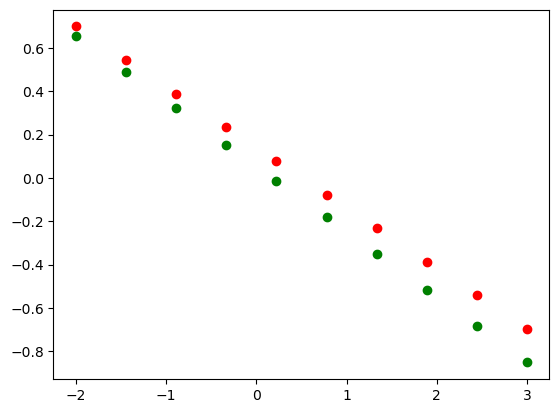

In [9]:
pipelines = []
for i in range(2):
    
    nr_of_data_points1 = 10
    noise_scale_factor1 = 0.1 # make the noise level relative to min/max Y-values.

#define intervals for simple data generation and visualization  
    interval_data = [-2, 3] # restrict the domain where we sample points
    interval_plot = [-2.5, 3.5] # plot interval
    interval_roots = [-3, 4] # allowing roots outside the plot interval gives more interesting polynomials.

# generate random coefficients. Note: we could generate the coefficients directly from a random generator, 
# but it gives nicer plots if we generate roots at random locations and then calculate the coefficients from there.
    roots1 = rng.uniform(interval_roots[0], interval_roots[1], poly_order) 
    coefficients1 = np.poly(roots) *0.02 # avoid huge values. Scale coeffs down by 0.02

# reshaping transfroms the data from a n-dim-vector into an n-by-1 matrix
    X_Data1 = np.linspace(interval_data[0], interval_data[1], nr_of_data_points1).reshape(-1, 1)
    Y_no_noise1 =  np.polyval(coefficients1, X_Data1) 
    range_y1 = np.max(Y_no_noise1) - np.min(Y_no_noise1)
    noise1 = rng.normal(loc=0.0, scale=range_y1*noise_scale_factor1, size=Y_no_noise1.shape)
    Y_Data1 = Y_no_noise1 + noise1

    scaler1 = StandardScaler()
    polynomial_features1 = PolynomialFeatures(1, include_bias=False)
    linear_regression1 = LinearRegression()
    pipeline1 = Pipeline(
        [
            ("polynomial_features", polynomial_features1),
            ('scaler', scaler1),            
            ("linear_regression", linear_regression1),
        ]
    )
    pipeline1.fit(X_Data1, Y_Data1)
    pipelines.append(pipeline1)
    
#print(pipeline1.named_steps['linear_regression'].coef_)
#print(pipeline1.named_steps['linear_regression'].intercept_)
for i in range(2):
    p = pipelines[i]
    if i == 0:
        plt.scatter(X_Data1, p.predict(X_Data1), label="Model", color='red')
    if i == 1:
        plt.scatter(X_Data1, p.predict(X_Data1), label="Model", color='green')
    